In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score


In [2]:
data=pd.read_csv('Cleaned-Data/Cleaned-Data.csv')

In [3]:
data.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [4]:
target=data[['Severity_Mild','Severity_Moderate','Severity_None','Severity_Severe']]
Target=(np.argmax(np.array(target),axis=1))

In [5]:
features=data.drop(['Severity_Mild','Severity_Moderate','Severity_None','Severity_Severe','Contact_Dont-Know','Contact_No','Contact_Yes','Country'],axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, Target, test_size=0.33, random_state=42)

In [42]:
def accuracy(x,y):
    count=0
    for each in range(len(x)):
        if x[each]==y[each]:
            count+=1
    return (count/len(x))

def make_plot(train,txt1,test,txt2,title):
    plt.figure(figsize=(10,5))
    plt.plot(range(1,len(train)+1),train,label='Train')
    plt.plot(range(1,len(test)+1),test,label='Test')
    plt.xlabel('Depth')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()


### Decision Trees

In [45]:
train_acc=[]
test_acc=[]
for depth in range(2,50):
    X_train, X_test, y_train, y_test=train_test_split(features, Target, test_size=0.33)
    dt_clf = tree.DecisionTreeClassifier(max_depth=depth)
    dt_clf = dt_clf.fit(X_train, y_train)
    train_predict=dt_clf.predict(X_train)
    #print('For depth ',depth,'train accuracy is',accuracy(y_train,train_predict))
    train_acc.append(accuracy(y_train,train_predict))
    test_predict=dt_clf.predict(X_test)
    test_acc.append(accuracy(y_test,test_predict))
    #print('For depth ',depth,'test accuracy is',accuracy(y_test,test_predict))
    

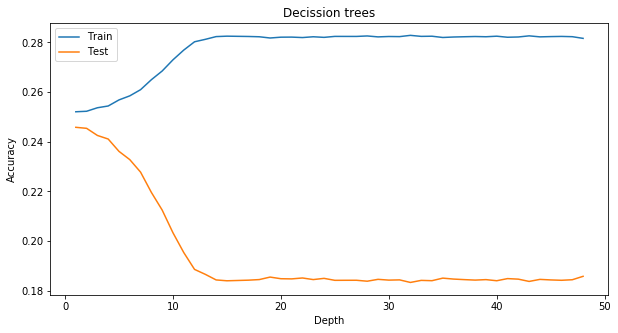

In [43]:
make_plot(train_acc,'Train',test_acc,'Test','Decission trees')

## Logistic Regression

In [47]:
train_acc=[]
test_acc=[]
for depth in range(2,50):
    X_train, X_test, y_train, y_test=train_test_split(features, Target, test_size=0.33)
    dt_clf = LogisticRegression()
    dt_clf = dt_clf.fit(X_train, y_train)
    train_predict=dt_clf.predict(X_train)
    #print('For depth ',depth,'train accuracy is',accuracy(y_train,train_predict))
    train_acc.append(accuracy(y_train,train_predict))
    test_predict=dt_clf.predict(X_test)
    test_acc.append(accuracy(y_test,test_predict))
    #print('For depth ',depth,'test accuracy is',accuracy(y_test,test_predict))
    del(dt_clf)

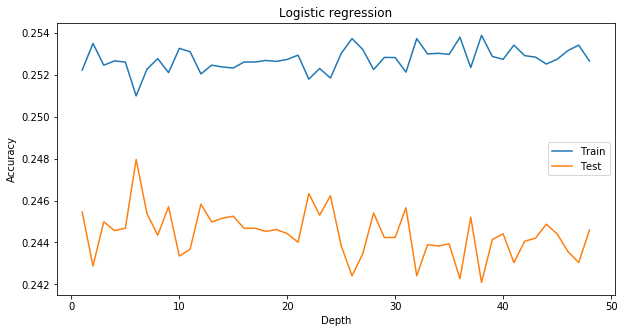

In [49]:
make_plot(train_acc,'Train',test_acc,'Test','Logistic regression')

### MNB

In [54]:
train_acc=[]
test_acc=[]
for depth in range(2,50):
    X_train, X_test, y_train, y_test=train_test_split(features, Target, test_size=0.33)
    dt_clf = MultinomialNB()
    dt_clf = dt_clf.fit(X_train, y_train)
    train_predict=dt_clf.predict(X_train)
    #print('For depth ',depth,'train accuracy is',accuracy(y_train,train_predict))
    train_acc.append(accuracy(y_train,train_predict))
    test_predict=dt_clf.predict(X_test)
    test_acc.append(accuracy(y_test,test_predict))
    #print('For depth ',depth,'test accuracy is',accuracy(y_test,test_predict))
    

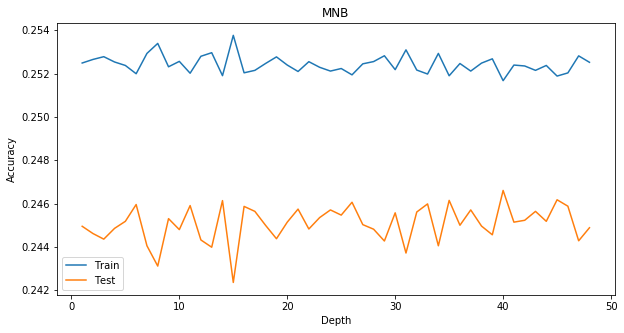

In [55]:
make_plot(train_acc,'Train',test_acc,'Test','MNB')